In [6]:
# import libraries
import numpy as np
import pandas as pd
from multiprocessing import Pool
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Flatten, concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [7]:
folder_path = "citibike/"  # Replace with your folder path
citibike_files = [
    folder_path + "202201-citibike-tripdata_1.csv",
    folder_path + "202201-citibike-tripdata_2.csv",
    folder_path + "202202-citibike-tripdata_1.csv",
    folder_path + "202202-citibike-tripdata_2.csv",
    folder_path + "202203-citibike-tripdata_1.csv",
    folder_path + "202203-citibike-tripdata_2.csv",
    folder_path + "202204-citibike-tripdata_1.csv",
    folder_path + "202204-citibike-tripdata_2.csv",
    folder_path + "202204-citibike-tripdata_3.csv",
    folder_path + "202205-citibike-tripdata_1.csv",
    folder_path + "202205-citibike-tripdata_2.csv",
    folder_path + "202205-citibike-tripdata_3.csv",
    folder_path + "202206-citibike-tripdata_1.csv",
    folder_path + "202206-citibike-tripdata_2.csv",
    folder_path + "202206-citibike-tripdata_3.csv",
    folder_path + "202206-citibike-tripdata_4.csv",
    folder_path + "202207-citibike-tripdata_1.csv",
    folder_path + "202207-citibike-tripdata_2.csv",
    folder_path + "202207-citibike-tripdata_3.csv",
    folder_path + "202208-citibike-tripdata_1.csv",
    folder_path + "202208-citibike-tripdata_2.csv",
    folder_path + "202208-citibike-tripdata_3.csv",
    folder_path + "202208-citibike-tripdata_4.csv",
    folder_path + "202209-citibike-tripdata_1.csv",
    folder_path + "202209-citibike-tripdata_2.csv",
    folder_path + "202209-citibike-tripdata_3.csv",
    folder_path + "202209-citibike-tripdata_4.csv",
    folder_path + "202210-citibike-tripdata_1.csv",
    folder_path + "202210-citibike-tripdata_2.csv",
    folder_path + "202210-citibike-tripdata_3.csv",
    folder_path + "202211-citibike-tripdata_1.csv",
    folder_path + "202211-citibike-tripdata_2.csv",
    folder_path + "202211-citibike-tripdata_3.csv",
    folder_path + "202212-citibike-tripdata_1.csv",
    folder_path + "202212-citibike-tripdata_2.csv",
]
# Combine all datasets into a single DataFrame
combined_citibike_data = pd.concat(
    (pd.read_csv(file) for file in citibike_files), ignore_index=True
)

# Save the combined DataFrame to a CSV file
combined_citibike_data.to_csv("combined_citibike_tripdata_1.csv", index=False)

# Display confirmation
print(f"Combined {len(citibike_files)} files into 'combined_citibike_tripdata.csv'.")
print(f"Combined DataFrame has {combined_citibike_data.shape[0]} rows and {combined_citibike_data.shape[1]} columns.")

Combined 35 files into 'combined_citibike_tripdata.csv'.
Combined DataFrame has 29440874 rows and 13 columns.


In [8]:
# Data Visulaization of combined data of citibank
combined_citibike_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member


In [ ]:
# Load the datasets from the working directory
# 3817634 is New York Weather Data
df_3817634 = pd.read_csv('3817634.csv')
df_MTA_ridership = pd.read_csv('MTA_Daily_Ridership_Data__Beginning_2020_20241020.csv')
df_point_of_interest = pd.read_csv('Point_Of_Interest.csv')

# Display basic information about each dataset
print(f"Dataset '3817634': {df_3817634.shape[0]} rows, {df_3817634.shape[1]} columns.")
print(f"Dataset 'MTA_Daily_Ridership_Data__Beginning_2020_20241020': {df_MTA_ridership.shape[0]} rows, {df_MTA_ridership.shape[1]} columns.")
print(f"Dataset 'Point_Of_Interest': {df_point_of_interest.shape[0]} rows, {df_point_of_interest.shape[1]} columns.")


Dataset '3817634': 31937 rows, 31 columns.
Dataset 'MTA_Daily_Ridership_Data__Beginning_2020_20241020': 1692 rows, 15 columns.
Dataset 'Point_Of_Interest': 20585 rows, 16 columns.


In [10]:
def preprocess_data(df):
    """
    Preprocesses a dataframe by imputing missing numerical values with the median.
    """
    # Identify numerical columns
    numerical_cols = df.select_dtypes(include=['number']).columns

    if not numerical_cols.empty:
        # Impute missing numerical values with the median
        imputer = SimpleImputer(strategy='median')
        df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

    return df

In [11]:
# Preprocess and clean each dataframe
df_3817634_cleaned = preprocess_data(df_3817634)
df_MTA_ridership_cleaned = preprocess_data(df_MTA_ridership)
df_point_of_interest_cleaned = preprocess_data(df_point_of_interest)
combined_citibike_data_cleaned = preprocess_data(combined_citibike_data)


print("All datasets have been preprocessed and saved with the 'cleaned_' prefix.")

All datasets have been preprocessed and saved with the 'cleaned_' prefix.


In [12]:
def eda_summary(df, name):
    """
    Summarizes and visualizes the dataset.
    """
    print(f"\n--- EDA for {name} ---")
    
    # Display basic information
    print(df.info())
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nSummary Statistics:\n", df.describe())

    # Visualize numerical columns
    num_cols = df.select_dtypes(include=['number']).columns
    if not num_cols.empty:
        df[num_cols].hist(bins=20, figsize=(16, 12), edgecolor='black')
        plt.suptitle(f'Numerical Feature Distributions - {name}', size=16)
        plt.show()

    # Correlation heatmap
    if len(num_cols) > 1:
        plt.figure(figsize=(8, 6))
        sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
        plt.title(f'Correlation Heatmap - {name}')
        plt.show()



--- EDA for Dataset 3817634 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31937 entries, 0 to 31936
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  31937 non-null  object 
 1   NAME     31937 non-null  object 
 2   DATE     31937 non-null  object 
 3   AWND     31937 non-null  float64
 4   DAPR     31937 non-null  float64
 5   DASF     31937 non-null  float64
 6   MDPR     31937 non-null  float64
 7   MDSF     31937 non-null  float64
 8   PGTM     31937 non-null  float64
 9   PRCP     31937 non-null  float64
 10  SNOW     31937 non-null  float64
 11  SNWD     31937 non-null  float64
 12  TAVG     31937 non-null  float64
 13  TMAX     31937 non-null  float64
 14  TMIN     31937 non-null  float64
 15  TOBS     31937 non-null  float64
 16  WDF2     31937 non-null  float64
 17  WDF5     31937 non-null  float64
 18  WESD     31937 non-null  float64
 19  WESF     31937 non-null  float64
 20  WSF2     31937 no

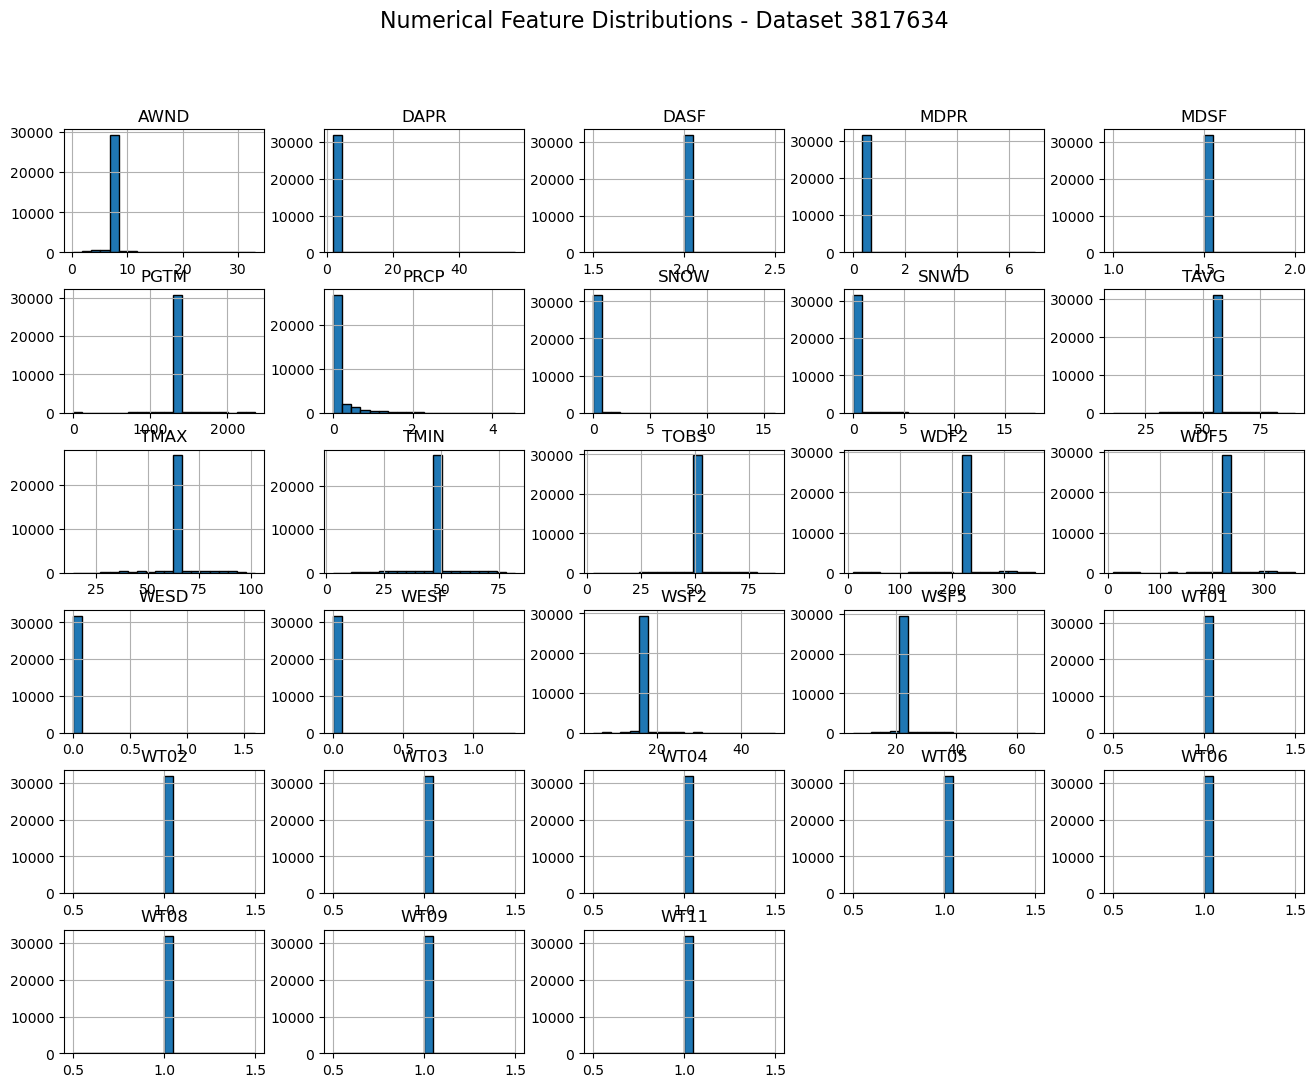

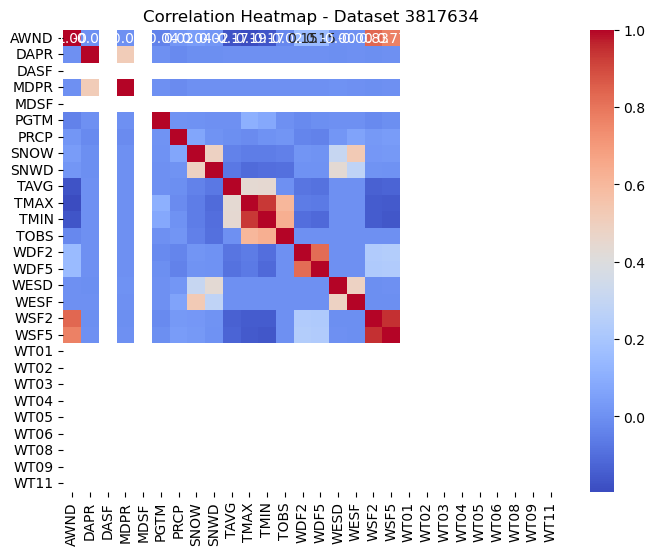


--- EDA for MTA Daily Ridership Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 15 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Date                                                     1692 non-null   object 
 1   Subways: Total Estimated Ridership                       1692 non-null   float64
 2   Subways: % of Comparable Pre-Pandemic Day                1692 non-null   float64
 3   Buses: Total Estimated Ridership                         1692 non-null   float64
 4   Buses: % of Comparable Pre-Pandemic Day                  1692 non-null   float64
 5   LIRR: Total Estimated Ridership                          1692 non-null   float64
 6   LIRR: % of Comparable Pre-Pandemic Day                   1692 non-null   float64
 7   Metro-North: Total Estimated Ridership                   1692 non-null  

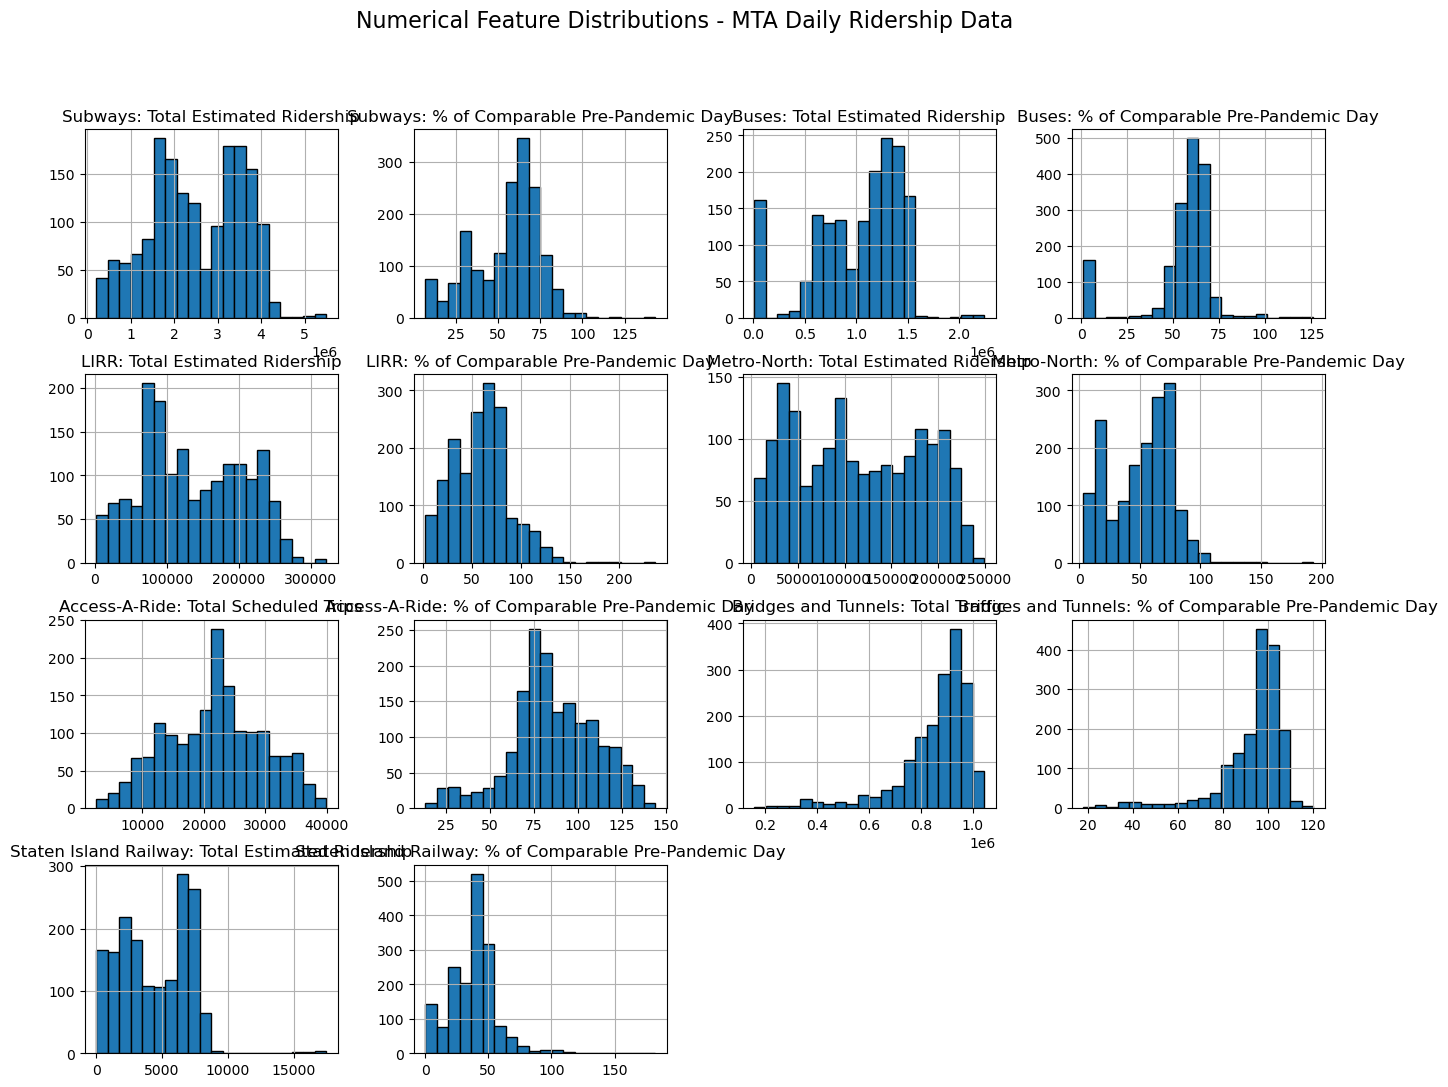

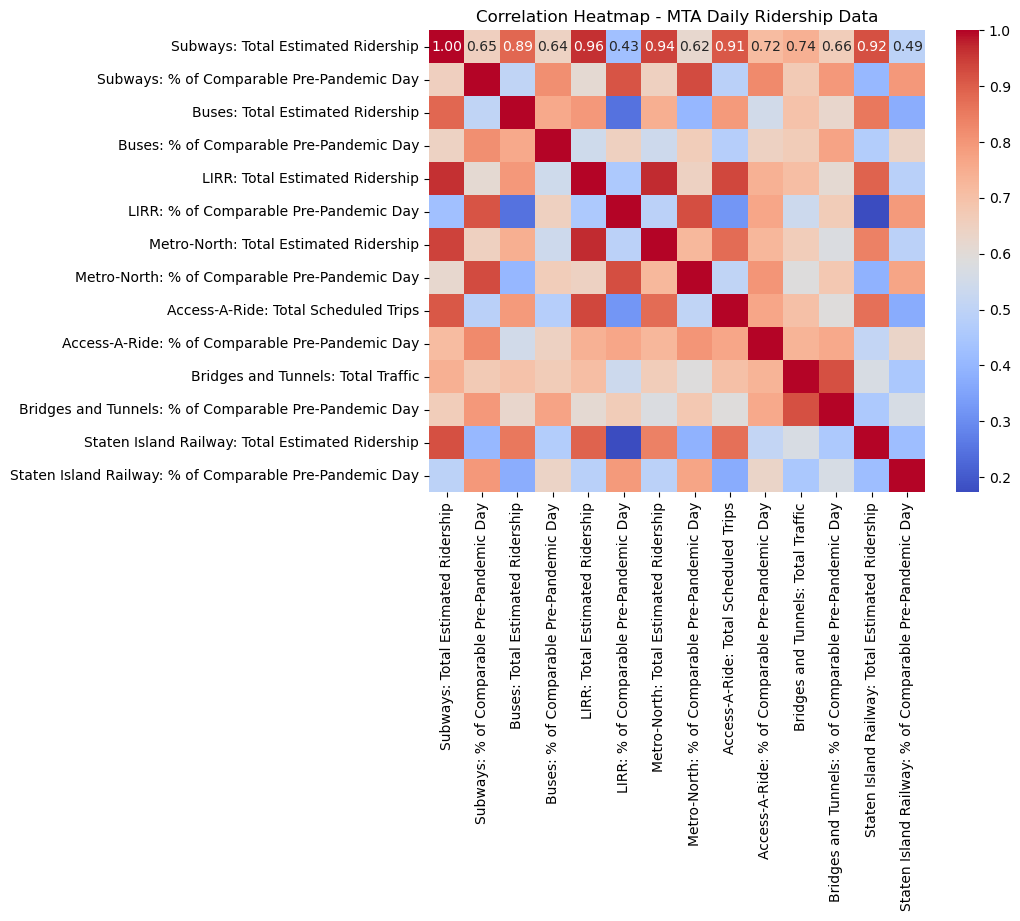


--- EDA for Point of Interest ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20585 entries, 0 to 20584
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   the_geom    20585 non-null  object 
 1   SEGMENTID   20585 non-null  float64
 2   COMPLEXID   20585 non-null  float64
 3   SAFTYPE     10537 non-null  object 
 4   SOS         20585 non-null  float64
 5   PLACEID     20585 non-null  float64
 6   FACI_DOM    20585 non-null  float64
 7   BIN         20585 non-null  float64
 8   BOROUGH     20585 non-null  float64
 9   CREATED     20585 non-null  object 
 10  MODIFIED    19166 non-null  object 
 11  FACILITY_T  20585 non-null  float64
 12  SOURCE      20585 non-null  object 
 13  B7SC        20585 non-null  float64
 14  PRI_ADD     20585 non-null  float64
 15  NAME        20585 non-null  object 
dtypes: float64(10), object(6)
memory usage: 2.5+ MB
None

Missing Values:
 the_geom          0
SEGMENTID         0
CO

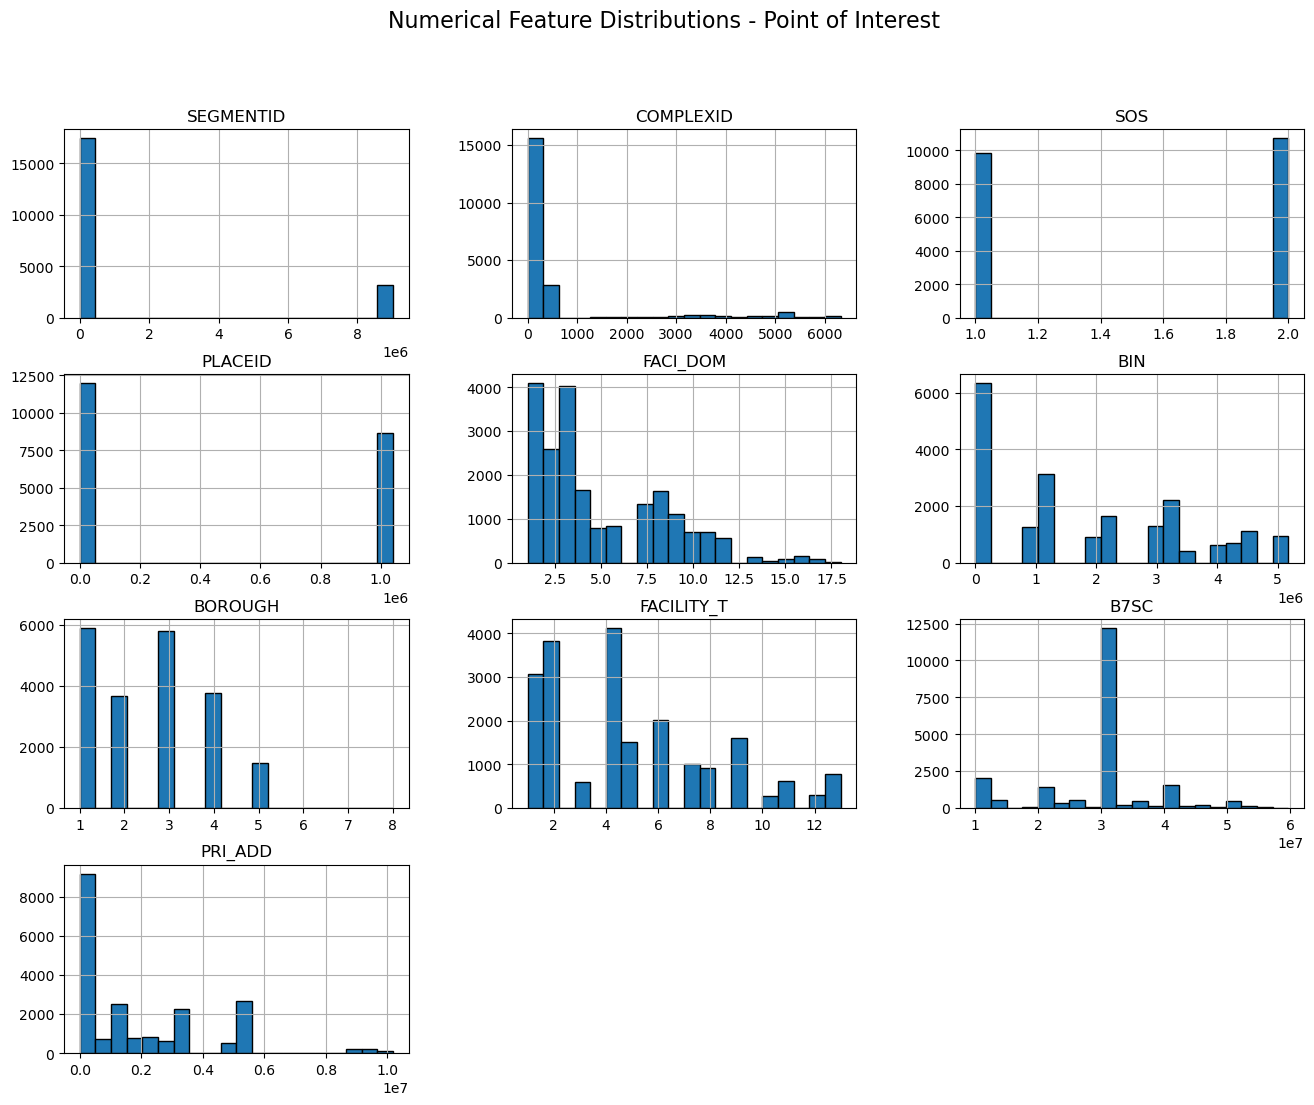

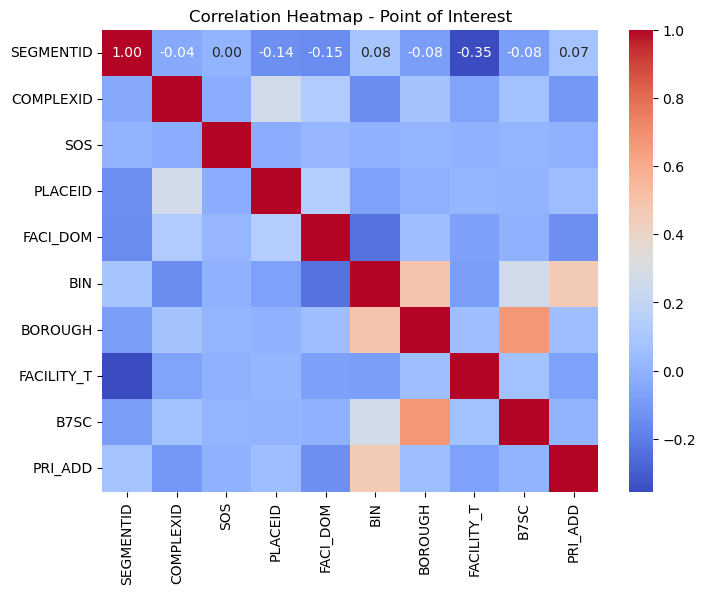


--- EDA for Combined CitiBike Trip Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29440874 entries, 0 to 29440873
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 2.9+ GB
None

Missing Values:
 ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name       49
start_station_id         49
end_station_name      70092
end_station_id        70092
start_lat                 0
start_lng         

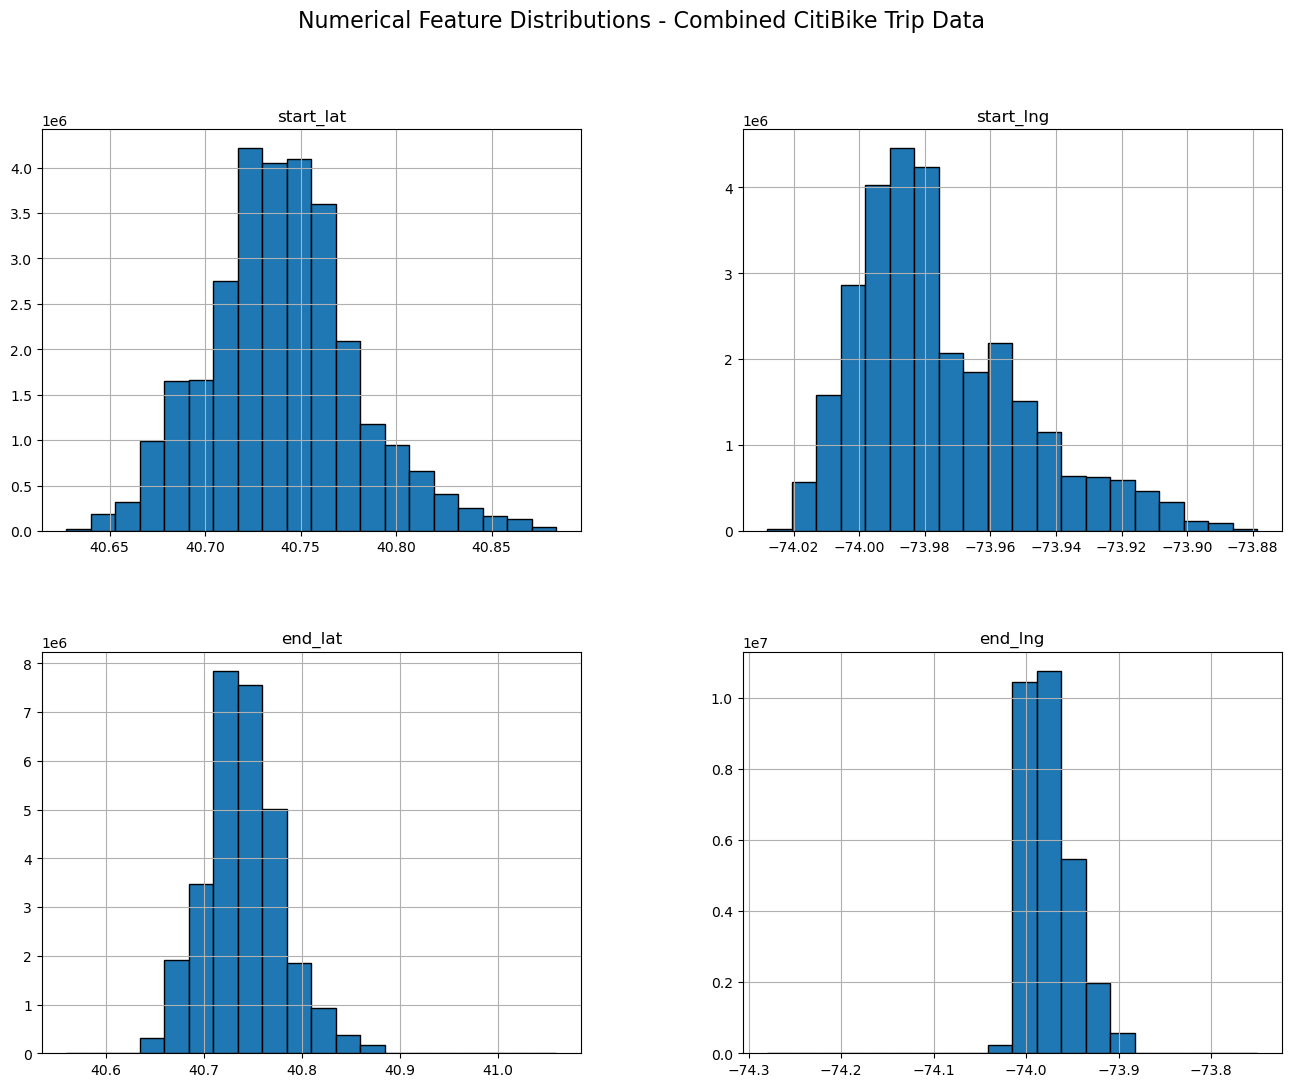

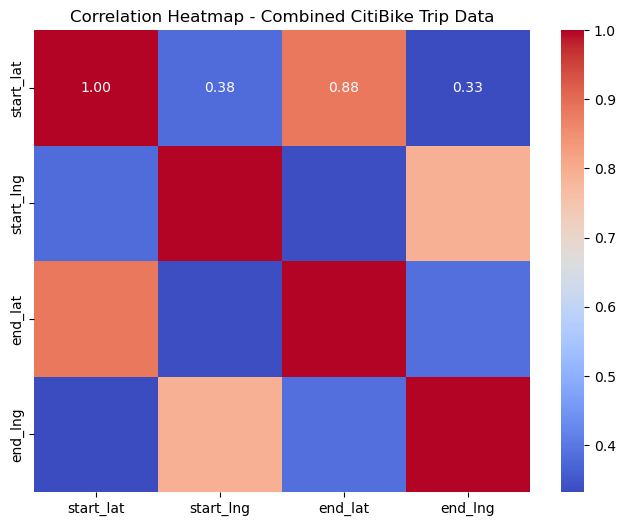

In [13]:
# Perform EDA for all datasets
eda_summary(df_3817634_cleaned, 'Dataset 3817634')
eda_summary(df_MTA_ridership_cleaned, 'MTA Daily Ridership Data')
eda_summary(df_point_of_interest_cleaned, 'Point of Interest')
eda_summary(combined_citibike_data_cleaned, 'Combined CitiBike Trip Data')

In [14]:
def analyze_outliers(df, name):
    """
    Analyzes outliers in the dataset's numerical columns using boxplots and z-scores.
    """
    print(f"\n--- Outlier Analysis for {name} ---")

    # Select numerical columns
    num_cols = df.select_dtypes(include=['number']).columns
    
    if num_cols.empty:
        print(f"No numerical columns in {name} to analyze for outliers.")
        return

    # Boxplots for visual detection
    for col in num_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot for {col} - {name}")
        plt.show()

    # Z-score analysis
    print("Z-Score Analysis:")
    z_threshold = 3  # Define a threshold for Z-scores
    outlier_counts = {}
    for col in num_cols:
        col_z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        outliers = (col_z_scores > z_threshold).sum()
        outlier_counts[col] = outliers

    print(f"Outliers per column in {name} (Z-score > {z_threshold}):")
    for col, count in outlier_counts.items():
        print(f"  {col}: {count} outlier(s)")

    # Visualizing distributions with potential outliers
    for col in num_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
        plt.title(f"Distribution of {col} with potential outliers - {name}")
        plt.legend()
        plt.show()


--- Outlier Analysis for MTA Daily Ridership Data ---


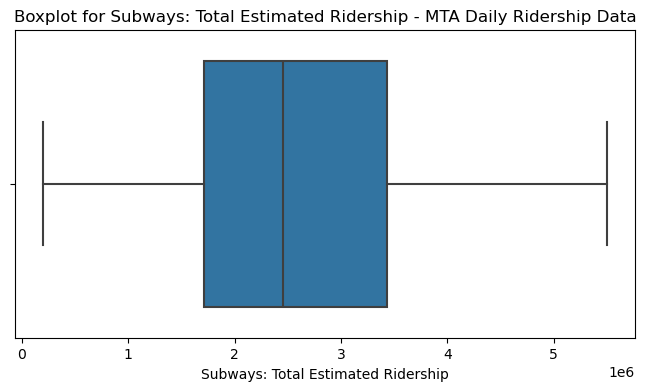

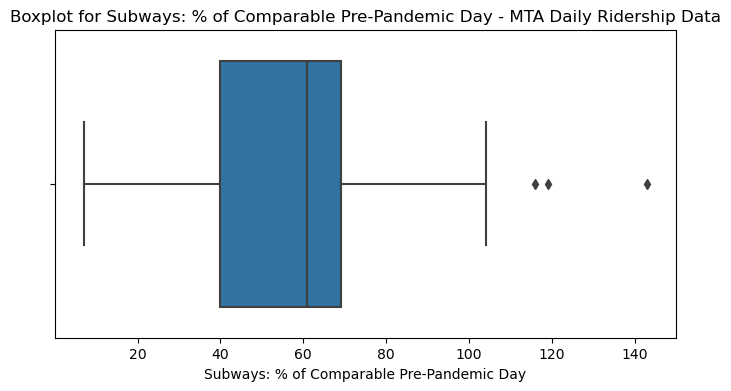

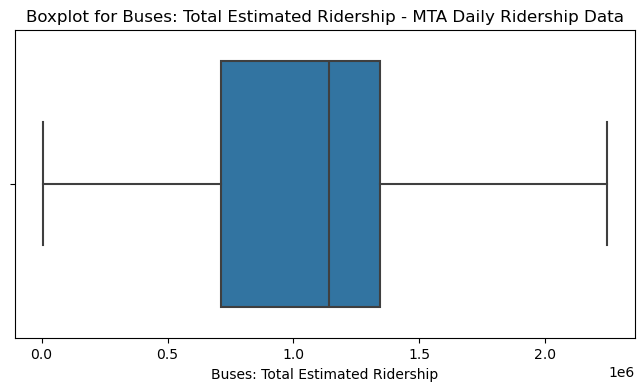

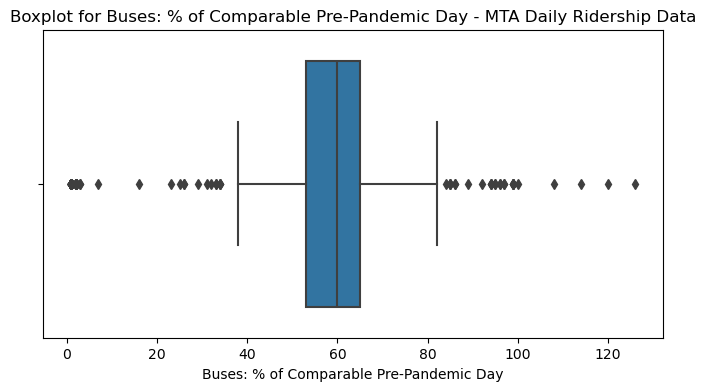

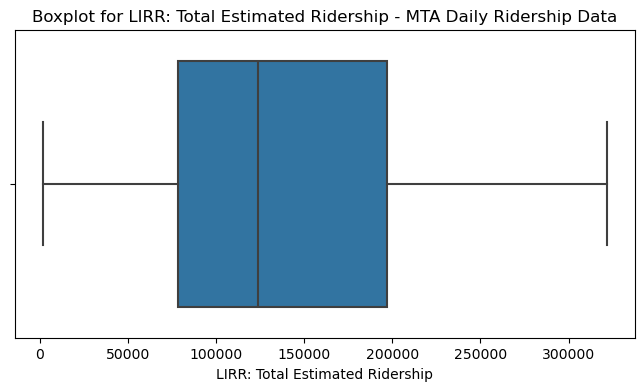

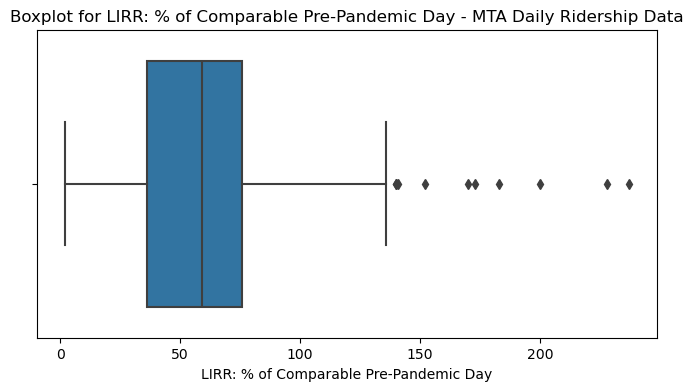

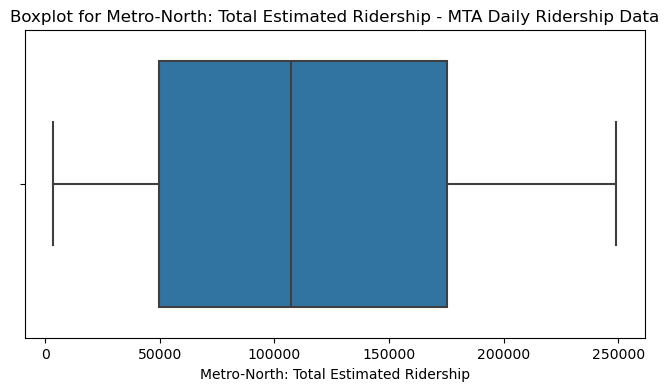

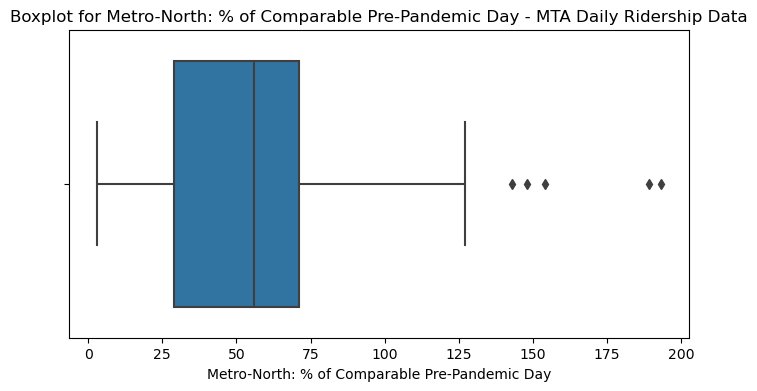

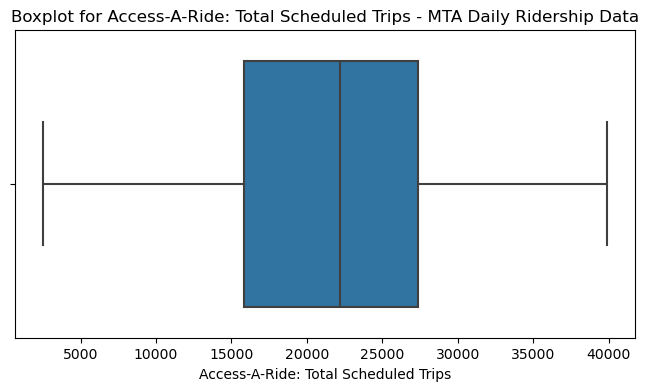

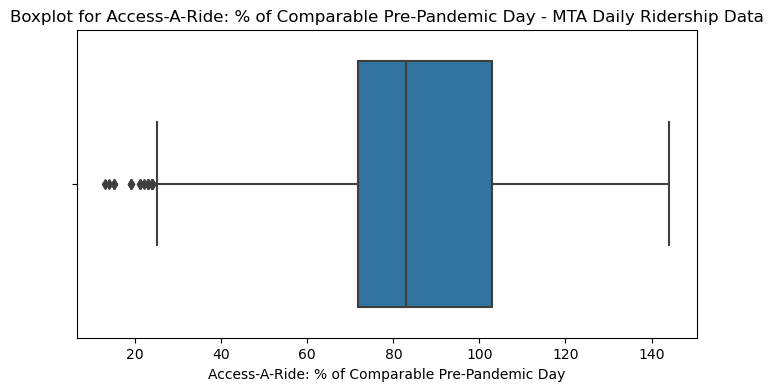

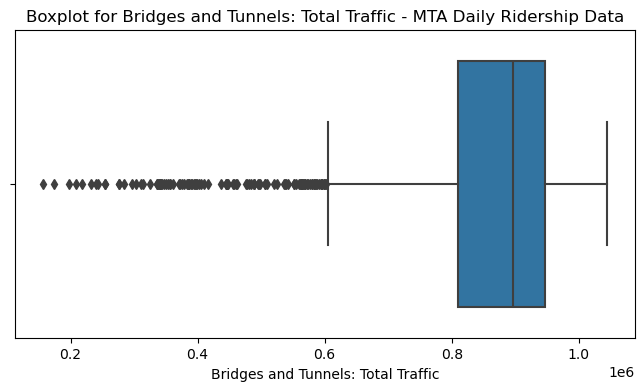

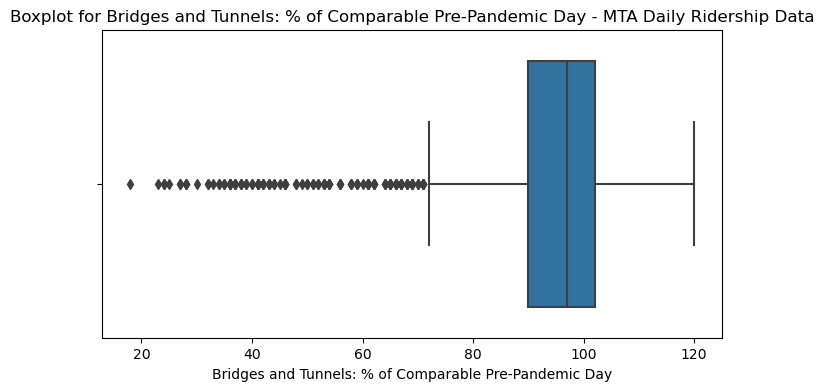

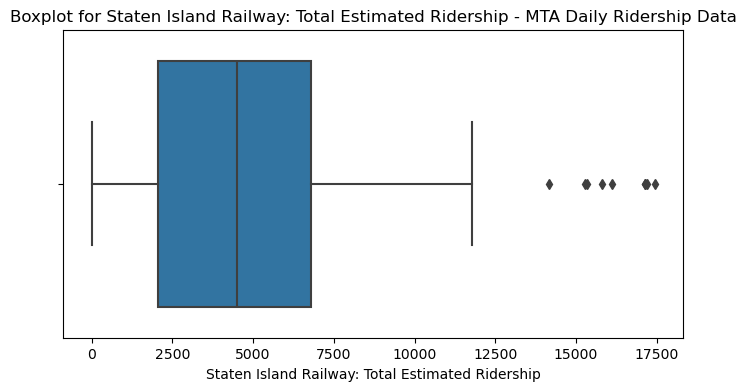

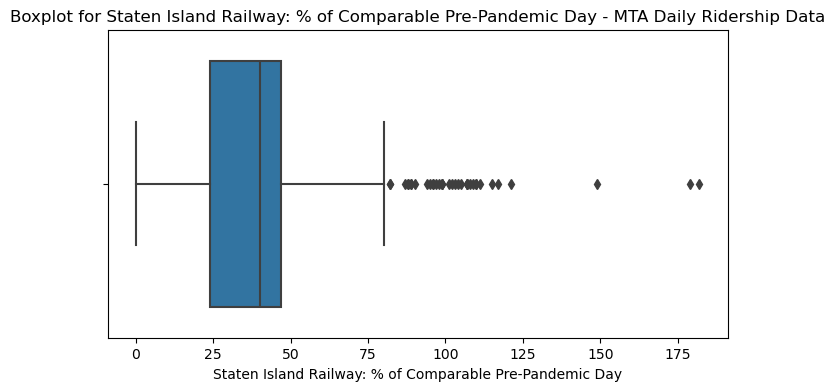

Z-Score Analysis:
Outliers per column in MTA Daily Ridership Data (Z-score > 3):
  Subways: Total Estimated Ridership: 0 outlier(s)
  Subways: % of Comparable Pre-Pandemic Day: 3 outlier(s)
  Buses: Total Estimated Ridership: 0 outlier(s)
  Buses: % of Comparable Pre-Pandemic Day: 3 outlier(s)
  LIRR: Total Estimated Ridership: 0 outlier(s)
  LIRR: % of Comparable Pre-Pandemic Day: 7 outlier(s)
  Metro-North: Total Estimated Ridership: 0 outlier(s)
  Metro-North: % of Comparable Pre-Pandemic Day: 5 outlier(s)
  Access-A-Ride: Total Scheduled Trips: 0 outlier(s)
  Access-A-Ride: % of Comparable Pre-Pandemic Day: 0 outlier(s)
  Bridges and Tunnels: Total Traffic: 51 outlier(s)
  Bridges and Tunnels: % of Comparable Pre-Pandemic Day: 57 outlier(s)
  Staten Island Railway: Total Estimated Ridership: 9 outlier(s)
  Staten Island Railway: % of Comparable Pre-Pandemic Day: 26 outlier(s)


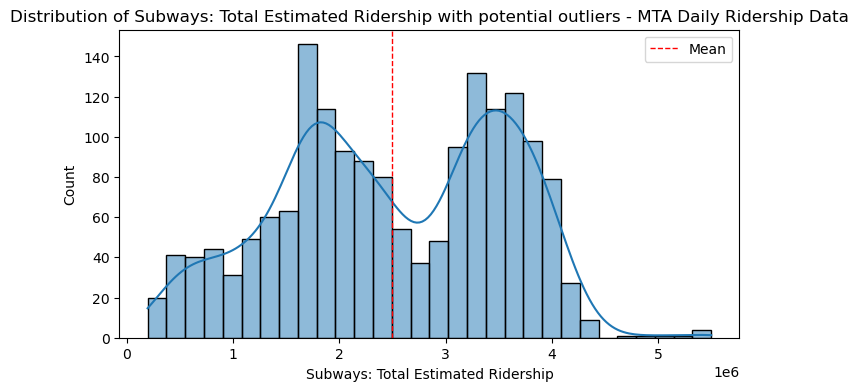

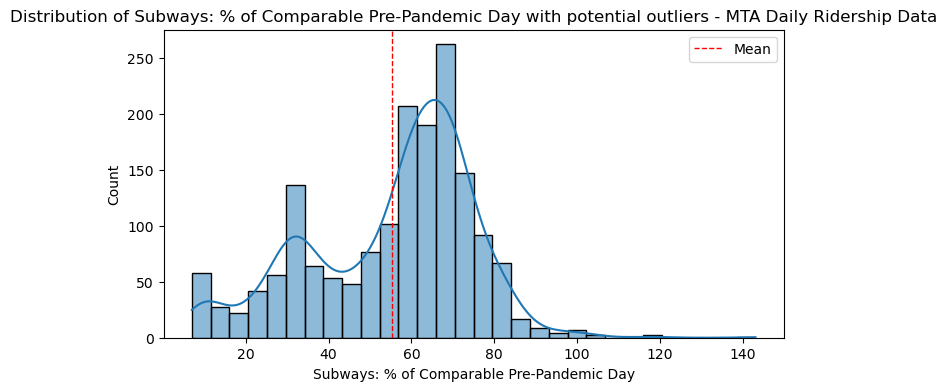

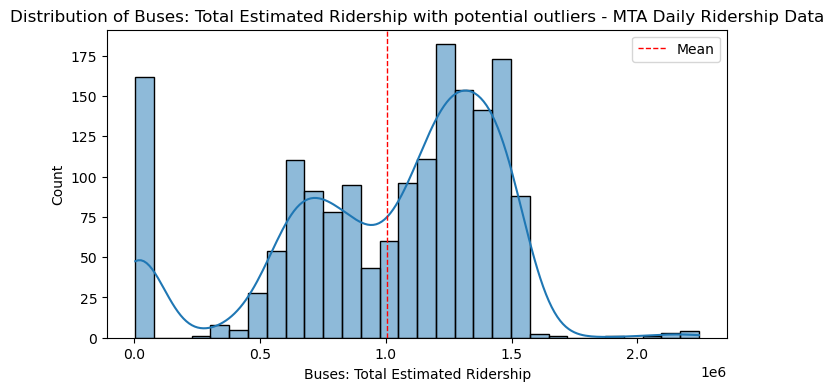

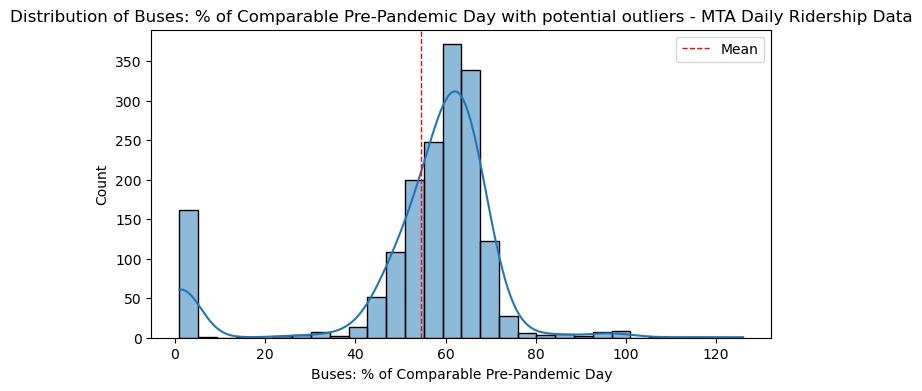

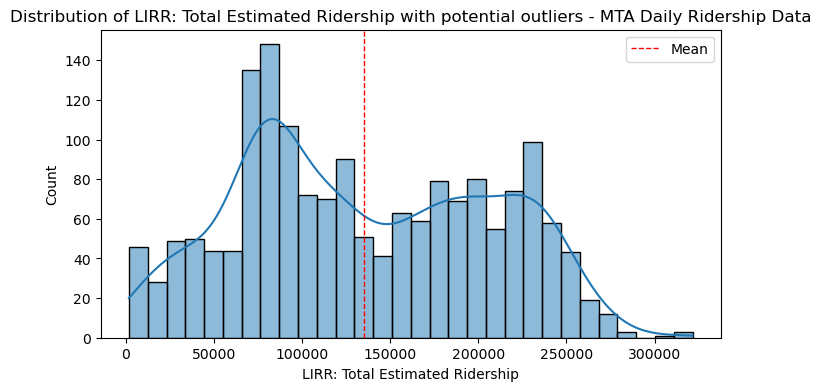

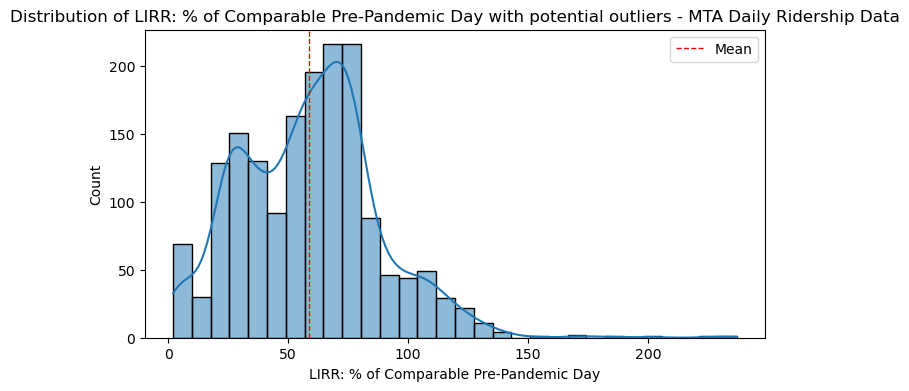

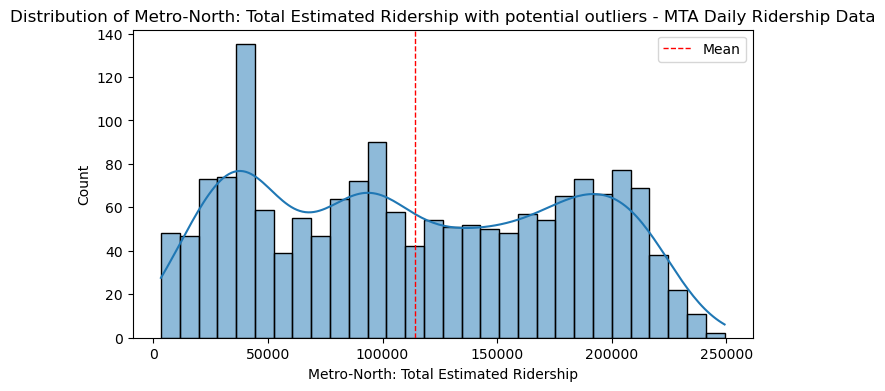

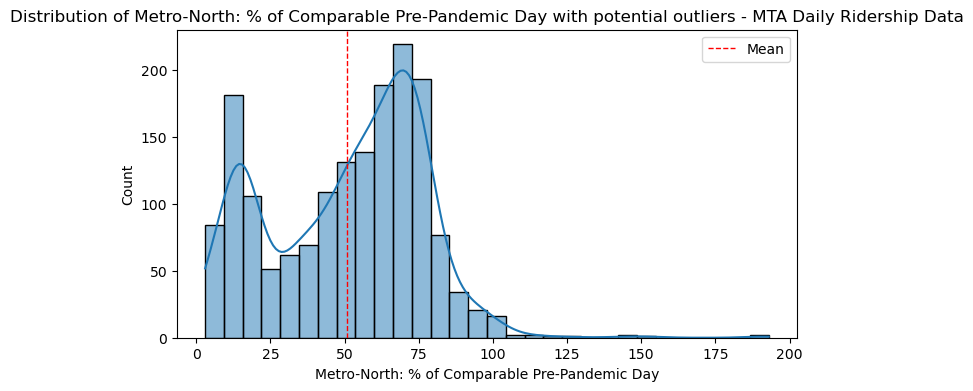

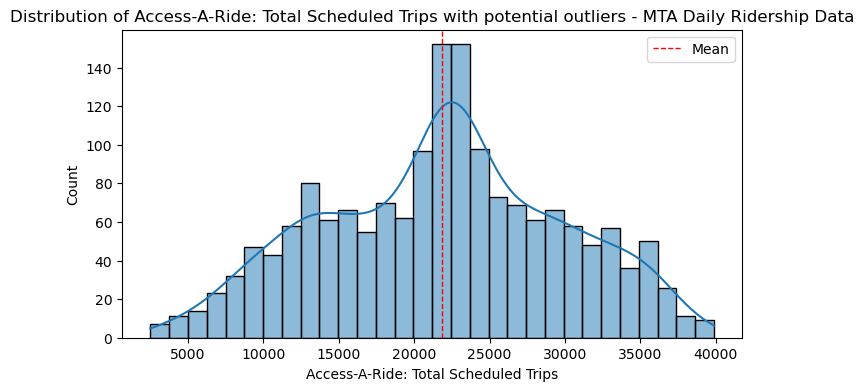

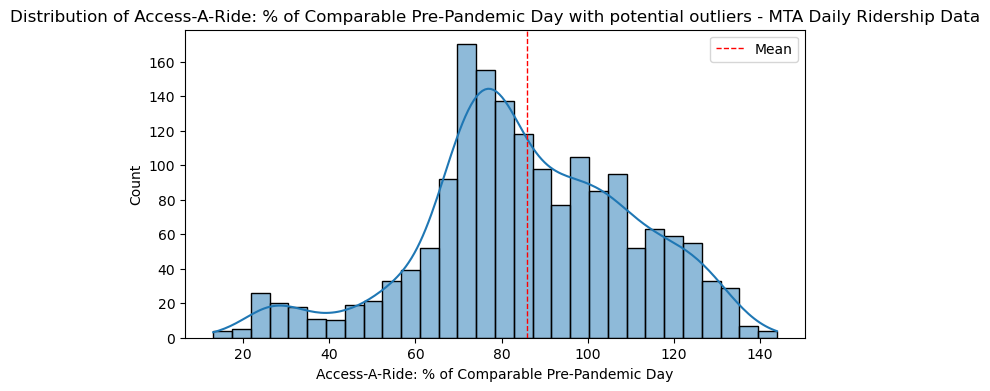

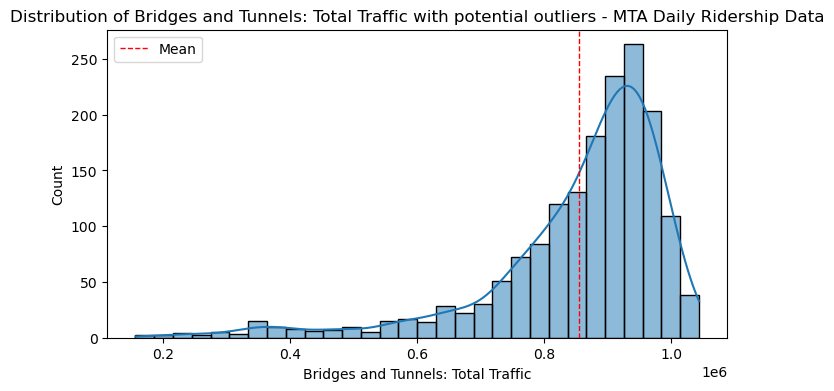

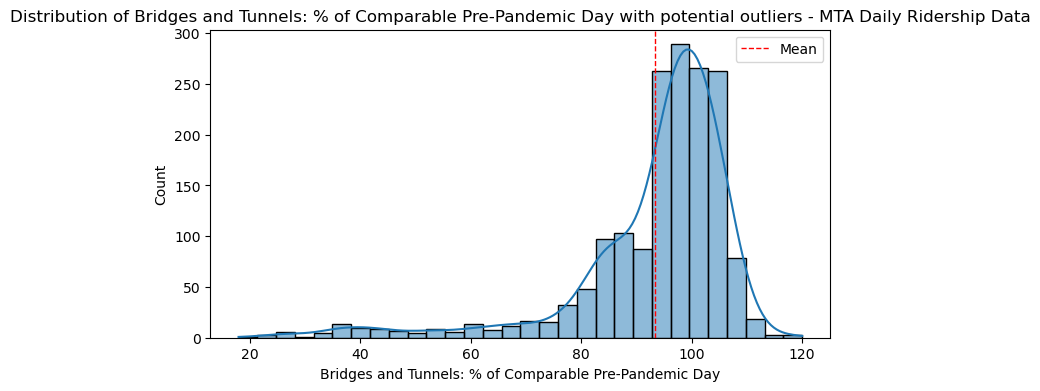

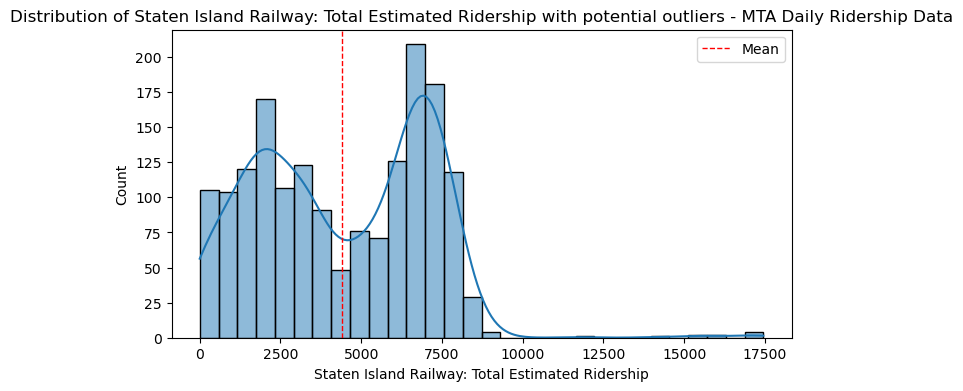

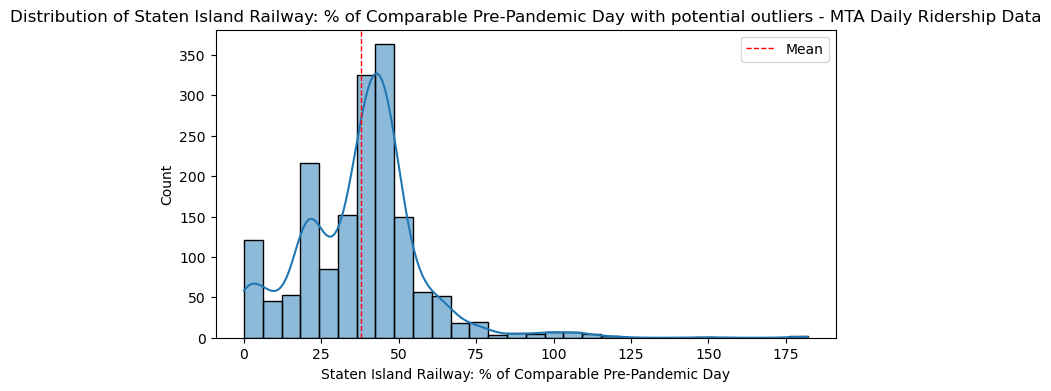


--- Outlier Analysis for Point of Interest ---


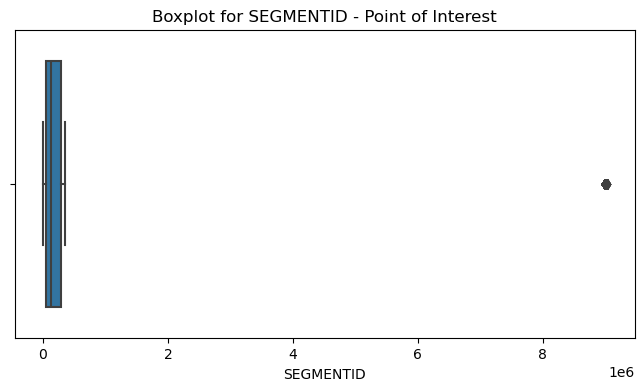

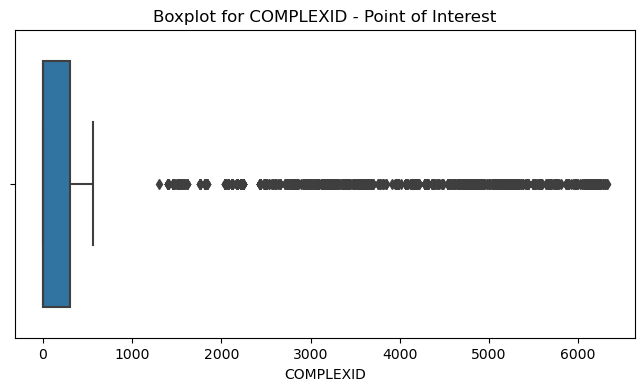

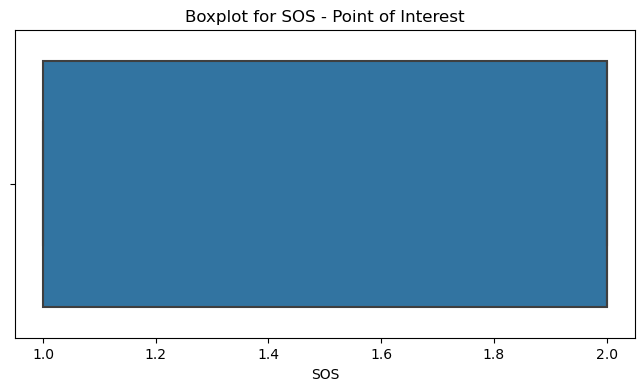

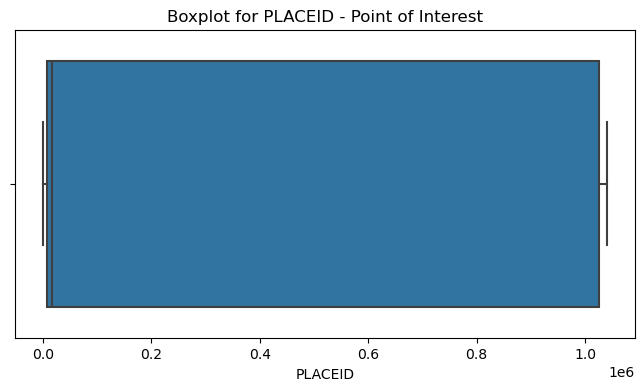

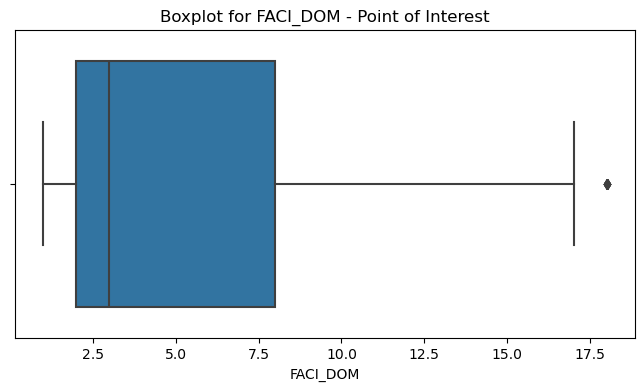

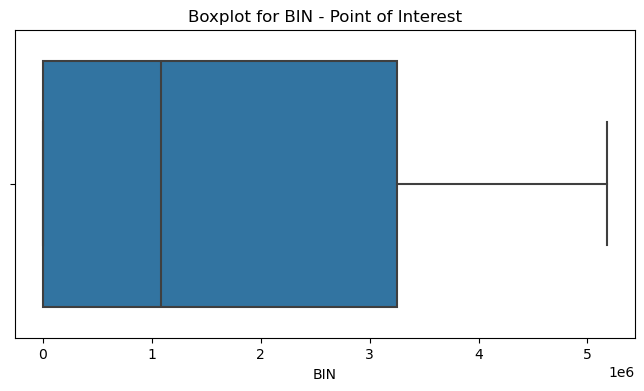

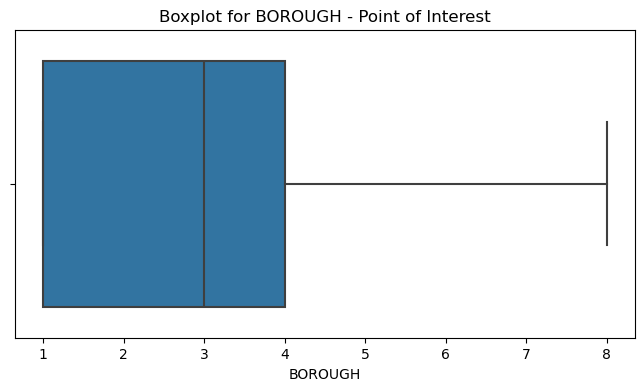

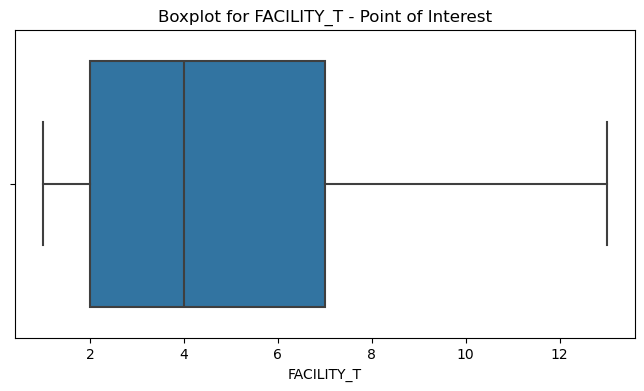

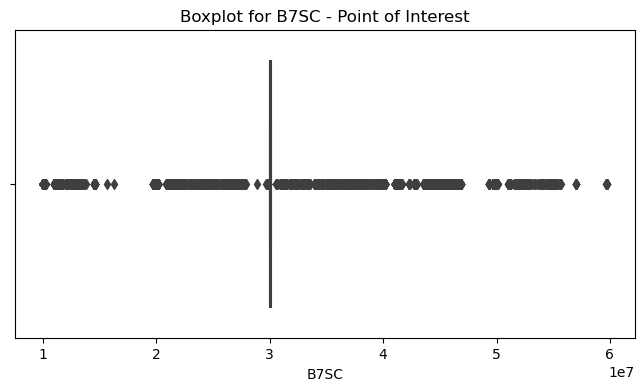

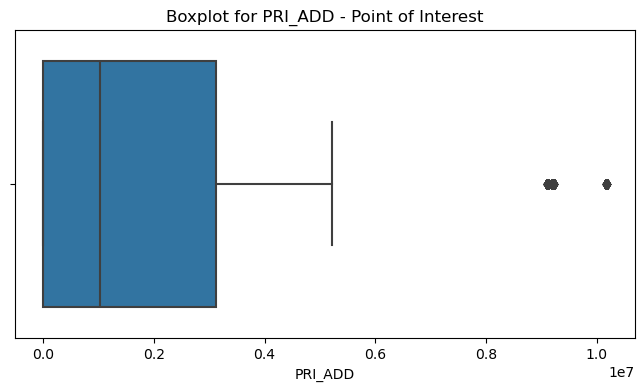

Z-Score Analysis:
Outliers per column in Point of Interest (Z-score > 3):
  SEGMENTID: 0 outlier(s)
  COMPLEXID: 1012 outlier(s)
  SOS: 0 outlier(s)
  PLACEID: 0 outlier(s)
  FACI_DOM: 260 outlier(s)
  BIN: 0 outlier(s)
  BOROUGH: 4 outlier(s)
  FACILITY_T: 0 outlier(s)
  B7SC: 13 outlier(s)
  PRI_ADD: 522 outlier(s)


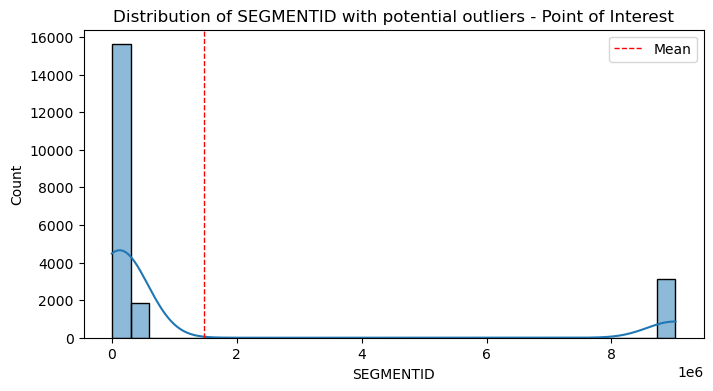

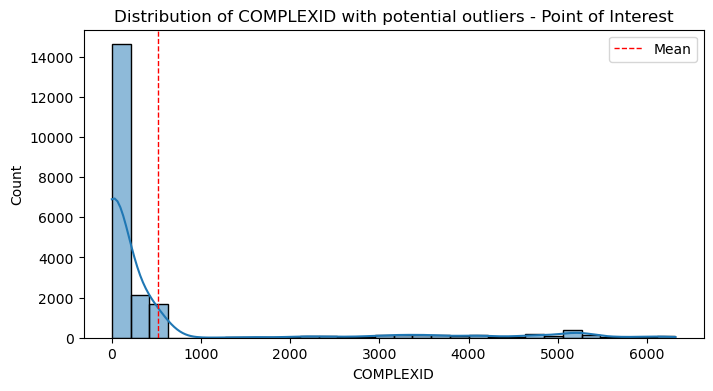

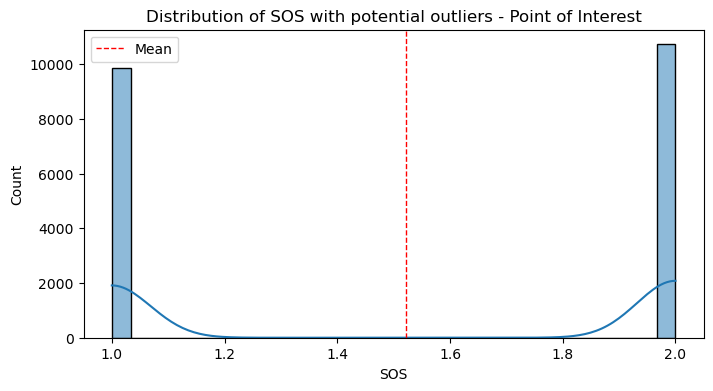

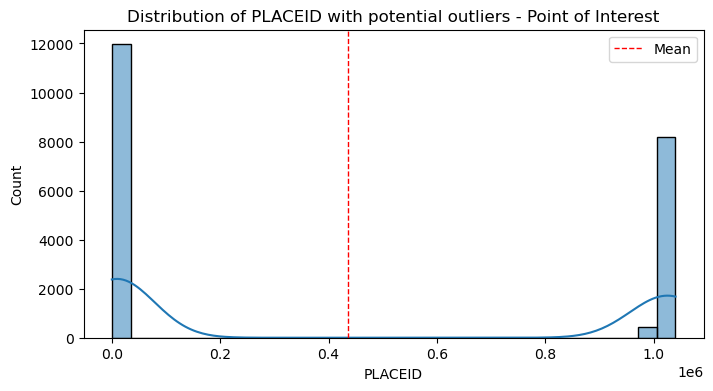

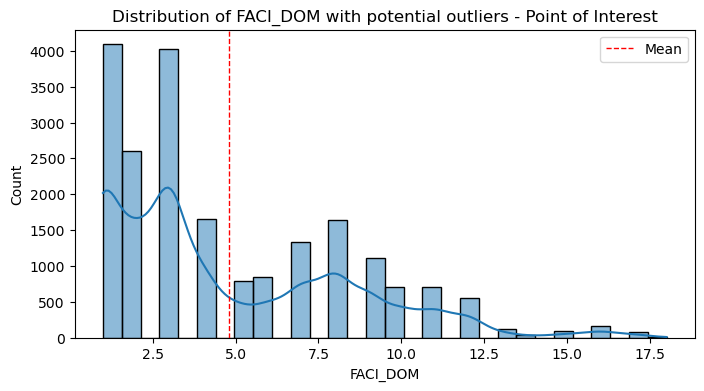

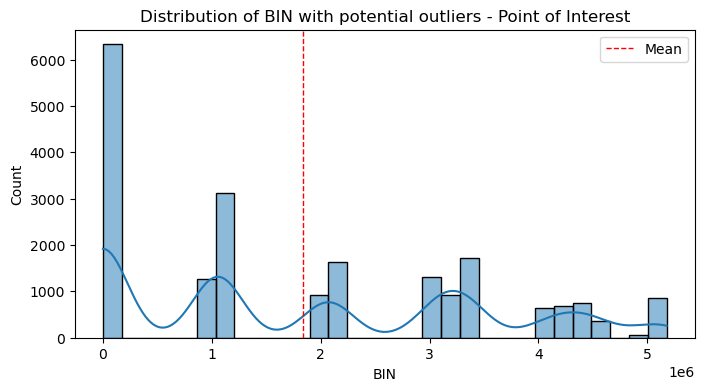

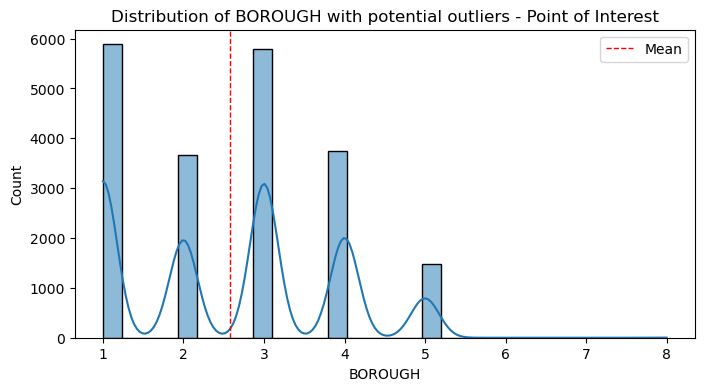

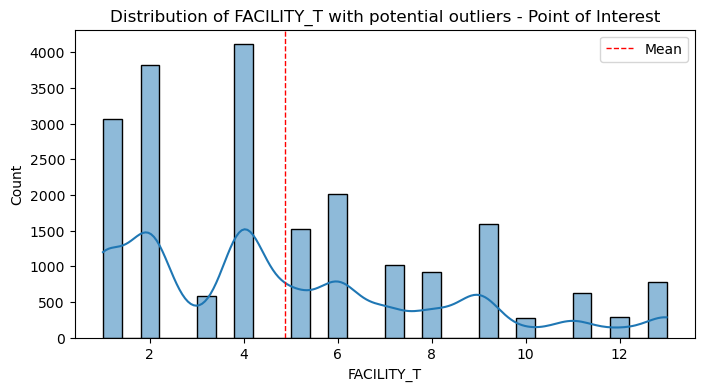

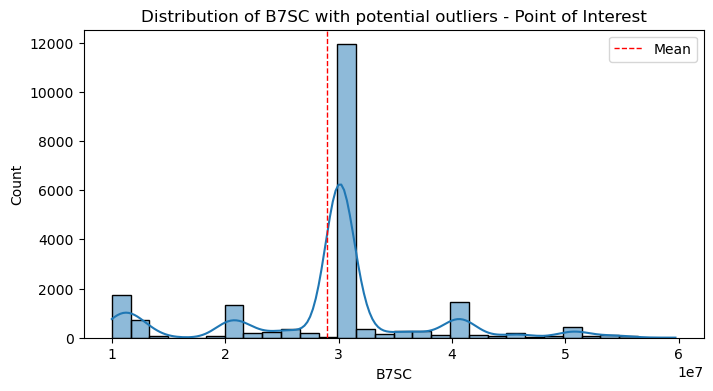

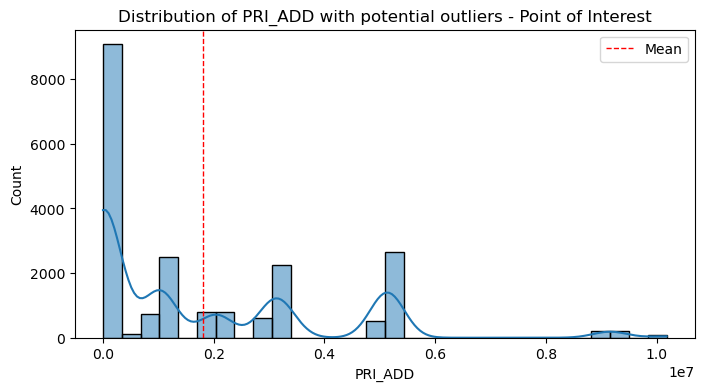

In [15]:
# Perform outlier analysis for all datasets
analyze_outliers(df_MTA_ridership_cleaned, 'MTA Daily Ridership Data')
analyze_outliers(df_point_of_interest_cleaned, 'Point of Interest')

In [16]:
def cap_outliers(df, col, lower_percentile=0.05, upper_percentile=0.95):
    """
    Caps outliers by replacing them with specified percentiles.
    """
    lower_cap = df[col].quantile(lower_percentile)
    upper_cap = df[col].quantile(upper_percentile)
    df[col] = df[col].clip(lower=lower_cap, upper=upper_cap)
    return df

# Example: Apply capping to numerical columns
def cap_outliers_for_all(df):
    num_cols = df.select_dtypes(include=['number']).columns
    for col in num_cols:
        df = cap_outliers(df, col)
    return df

In [17]:
df_3817634_cleaned_capped = cap_outliers_for_all(df_3817634_cleaned)
df_MTA_ridership_cleaned_capped = cap_outliers_for_all(df_MTA_ridership_cleaned)
df_point_of_interest_cleaned_capped = cap_outliers_for_all(df_point_of_interest_cleaned)
combined_citibike_data_cleaned_capped = cap_outliers_for_all(combined_citibike_data_cleaned)

In [18]:
def detect_outliers_zscore(df, threshold=3):
    """
    Detects outliers using the Z-score method for numerical columns.
    Returns a dictionary of column names and indices of outliers.
    """
    outliers = {}
    num_cols = df.select_dtypes(include=['number']).columns
    for col in num_cols:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        outlier_indices = np.where(z_scores > threshold)[0]
        outliers[col] = outlier_indices
        print(f"{col}: {len(outlier_indices)} outlier(s) detected using Z-score > {threshold}.")
    return outliers

In [19]:
detect_outliers_zscore(df_3817634_cleaned_capped)
detect_outliers_zscore(df_MTA_ridership_cleaned_capped)
detect_outliers_zscore(df_point_of_interest_cleaned_capped)
detect_outliers_zscore(combined_citibike_data_cleaned_capped)

AWND: 1598 outlier(s) detected using Z-score > 3.
DAPR: 0 outlier(s) detected using Z-score > 3.
DASF: 0 outlier(s) detected using Z-score > 3.
MDPR: 0 outlier(s) detected using Z-score > 3.
MDSF: 0 outlier(s) detected using Z-score > 3.
PGTM: 0 outlier(s) detected using Z-score > 3.
PRCP: 1731 outlier(s) detected using Z-score > 3.
SNOW: 0 outlier(s) detected using Z-score > 3.
SNWD: 0 outlier(s) detected using Z-score > 3.
TAVG: 0 outlier(s) detected using Z-score > 3.
TMAX: 0 outlier(s) detected using Z-score > 3.
TMIN: 1610 outlier(s) detected using Z-score > 3.
TOBS: 0 outlier(s) detected using Z-score > 3.
WDF2: 0 outlier(s) detected using Z-score > 3.
WDF5: 0 outlier(s) detected using Z-score > 3.
WESD: 0 outlier(s) detected using Z-score > 3.
WESF: 0 outlier(s) detected using Z-score > 3.
WSF2: 0 outlier(s) detected using Z-score > 3.
WSF5: 0 outlier(s) detected using Z-score > 3.
WT01: 0 outlier(s) detected using Z-score > 3.
WT02: 0 outlier(s) detected using Z-score > 3.
WT03

{'start_lat': array([], dtype=int64),
 'start_lng': array([], dtype=int64),
 'end_lat': array([], dtype=int64),
 'end_lng': array([], dtype=int64)}

In [20]:
def prepare_sequences_parallel(args):
    """
    Helper function to prepare sequences for a single batch of data.
    """
    df, num_cols, sequence_length, start_idx, end_idx, target_col = args
    X_batch = []
    y_batch = []
    for i in range(start_idx, end_idx):
        X_batch.append(df[num_cols].iloc[i:i+sequence_length].values)
        if target_col:
            y_batch.append(df[target_col].iloc[i+sequence_length])  # Predict the target column
    return np.array(X_batch), np.array(y_batch)

In [21]:
def prepare_time_series_efficient(df, sequence_length=30):
    """
    Prepares time-series data using vectorized NumPy operations.
    """
    # Select numerical columns
    num_cols = df.select_dtypes(include=['number']).columns
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[num_cols])
    
    # Prepare sequences and targets
    num_samples = len(scaled_data) - sequence_length
    X = np.lib.stride_tricks.sliding_window_view(scaled_data, (sequence_length, scaled_data.shape[1]))[:-1]
    X = X.reshape(num_samples, sequence_length, scaled_data.shape[1])
    return X

In [22]:
# Prepare data
sequence_length = 30
X_3817634 = prepare_time_series_efficient(df_3817634_cleaned_capped, sequence_length)
X_MTA = prepare_time_series_efficient(df_MTA_ridership_cleaned_capped, sequence_length)
X_POI = prepare_time_series_efficient(df_point_of_interest_cleaned_capped, sequence_length)
X_Citibike = prepare_time_series_efficient(combined_citibike_data_cleaned_capped, sequence_length)

In [23]:
def create_tf_dataset(X, y=None, batch_size=32, shuffle=True):
    """
    Creates a TensorFlow dataset using a generator to handle large datasets without memory issues.
    """
    dataset_size = X.shape[0]
    
    def data_generator():
        for i in range(dataset_size):
            if y is not None:
                yield X[i], y[i]
            else:
                yield X[i]
    
    # Define the output signature for the generator
    if y is not None:
        output_signature = (
            tf.TensorSpec(shape=X.shape[1:], dtype=tf.float32),
            tf.TensorSpec(shape=y.shape[1:] if len(y.shape) > 1 else (), dtype=tf.float32)
        )
    else:
        output_signature = tf.TensorSpec(shape=X.shape[1:], dtype=tf.float32)
    
    ds = tf.data.Dataset.from_generator(
        data_generator,
        output_signature=output_signature
    )
    
    if shuffle:
        ds = ds.shuffle(buffer_size=10000)
    ds = ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return ds

In [24]:
# Example: Creating datasets (replace `y` with the actual target labels)
batch_size = 64

# Assuming you have target variables `y_3817634`, `y_MTA`, `y_POI`, `y_Citibike`
# If you don't have labels (y), set y=None

train_ds_3817634 = create_tf_dataset(X_3817634, y=None, shuffle=True, batch_size=batch_size)
train_ds_MTA = create_tf_dataset(X_MTA, y=None, shuffle=True, batch_size=batch_size)
train_ds_POI = create_tf_dataset(X_POI, y=None, shuffle=True, batch_size=batch_size)
train_ds_Citibike = create_tf_dataset(X_Citibike, y=None, shuffle=True, batch_size=batch_size)

In [25]:
def create_rnn_cnn_block(input_shape):
    inp = Input(shape=input_shape)
    x = Conv1D(filters=32, kernel_size=3, activation='relu')(inp)
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(x)
    x = LSTM(50, return_sequences=False)(x)
    x = Dense(32, activation='relu')(x)
    return inp, x

In [26]:
# Distributed training for efficiency
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    # Create input blocks for each dataset
    input_3817634, output_3817634 = create_rnn_cnn_block(X_3817634.shape[1:])
    input_MTA, output_MTA = create_rnn_cnn_block(X_MTA.shape[1:])
    input_POI, output_POI = create_rnn_cnn_block(X_POI.shape[1:])
    input_Citibike, output_Citibike = create_rnn_cnn_block(X_Citibike.shape[1:])

    # Merge outputs
    merged = concatenate([output_3817634, output_MTA, output_POI, output_Citibike])
    merged = Dense(64, activation='relu')(merged)
    merged = Dense(32, activation='relu')(merged)
    final_output = Dense(1, activation='linear')(merged)

    # Define the model
    model = Model(inputs=[input_3817634, input_MTA, input_POI, input_Citibike], outputs=final_output)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)




In [27]:
def align_datasets(*datasets):
    """
    Aligns all datasets to the smallest size by truncating excess samples.
    """
    min_size = min(dataset.shape[0] for dataset in datasets)
    aligned_datasets = [dataset[:min_size] for dataset in datasets]
    return aligned_datasets

# Align all input datasets
X_3817634, X_MTA, X_POI, X_Citibike = align_datasets(X_3817634, X_MTA, X_POI, X_Citibike)

In [28]:
def predict_best_locations(model, datasets, top_n=10):
    """
    Predicts the best locations for bike placement using the trained model.

    Args:
        model: Trained TensorFlow model.
        datasets: List of input datasets for prediction.
        top_n: Number of top locations to return.

    Returns:
        Sorted list of top N locations with scores.
    """
    # Make predictions
    predictions = model.predict(datasets)

    # Combine predictions with indices
    locations_with_scores = [(i, score) for i, score in enumerate(predictions)]

    # Sort locations by predicted scores in descending order
    sorted_locations = sorted(locations_with_scores, key=lambda x: x[1], reverse=True)

    # Return the top N locations
    return sorted_locations[:top_n]

In [29]:
# Example Usage
# Assuming `model` is the trained model and the input data is already prepared
# Input data: [X_3817634, X_MTA, X_POI, X_Citibike]
top_n = 10
top_locations = predict_best_locations(model, [X_3817634, X_MTA, X_POI, X_Citibike], top_n)

# Display the results
print(f"Top {top_n} locations for bike placement (Index, Score):")
for idx, score in top_locations:
    print(f"Location Index: {idx}, Predicted Score: {score}")

52/52 [==============================] - 2s 8ms/step
Top 10 locations for bike placement (Index, Score):
Location Index: 1526, Predicted Score: [0.06858148]
Location Index: 1457, Predicted Score: [0.06717055]
Location Index: 1527, Predicted Score: [0.0659302]
Location Index: 1478, Predicted Score: [0.0638937]
Location Index: 1471, Predicted Score: [0.05961586]
Location Index: 1275, Predicted Score: [0.05881705]
Location Index: 1274, Predicted Score: [0.05834195]
Location Index: 1528, Predicted Score: [0.05768502]
Location Index: 1479, Predicted Score: [0.05751222]
Location Index: 1525, Predicted Score: [0.05712657]


In [30]:
def get_unique_station_details(metadata_df, top_locations):
    """
    Extracts unique station details (name, latitude, longitude) for the top locations.
    
    Args:
        metadata_df: DataFrame containing station metadata with columns 'start_station_name', 'start_lat', 'start_lng'.
        top_locations: List of tuples with (index, score) for top predicted locations.
    
    Returns:
        DataFrame with unique station details for the top locations.
    """
    # Get the top indices from predictions
    top_indices = [idx for idx, _ in top_locations]
    
    # Extract the relevant rows
    top_stations = metadata_df.iloc[top_indices][['start_station_name', 'start_lat', 'start_lng']]
    
    # Drop duplicate stations based on the station name
    unique_stations = top_stations.drop_duplicates(subset=['start_station_name'])
    
    return unique_stations

# Extract unique station details for top locations
unique_station_details = get_unique_station_details(combined_citibike_data_cleaned_capped, top_locations)

# Rename columns for clarity
unique_station_details.columns = ['Station Name', 'Latitude', 'Longitude']

# Display the results
print("Top Unique Stations for Bike Placement:")
print(unique_station_details)

Top Unique Stations for Bike Placement:
                      Station Name   Latitude  Longitude
1526           St Marks Pl & 2 Ave  40.728419 -73.987140
1457             E 2 St & Avenue B  40.722174 -73.983688
1478               S 5 Pl & S 5 St  40.710451 -73.960876
1471  Wythe Ave & Metropolitan Ave  40.716887 -73.963198
1275      Cleveland Pl & Spring St  40.722104 -73.997249
1479      Howard St & Lafayette St  40.719105 -73.999733
1525     Pearl St & Hanover Square  40.704718 -74.008316


In [31]:
import folium
from IPython.display import display

def map_unique_station_details(unique_station_details):
    """
    Creates a map with markers for the top unique bike station locations.

    Args:
        unique_station_details: DataFrame with columns 'Station Name', 'Latitude', 'Longitude'.

    Returns:
        A folium map object with markers for the unique stations.
    """
    # Center the map on the average latitude and longitude of the stations
    map_center = [
        unique_station_details["Latitude"].mean(),
        unique_station_details["Longitude"].mean(),
    ]
    station_map = folium.Map(location=map_center, zoom_start=12)

    # Add a marker for each station
    for _, station in unique_station_details.iterrows():
        folium.Marker(
            location=[station["Latitude"], station["Longitude"]],
            popup=station["Station Name"],
            icon=folium.Icon(color="blue", icon="info-sign"),
        ).add_to(station_map)

    return station_map

# Generate the map
station_map = map_unique_station_details(unique_station_details)

# Display the map directly
station_map


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import datetime

# Load the dataset (replace with the actual variable if loaded elsewhere)
# combined_citibike_data_cleaned_capped is assumed to be preprocessed
# Example DataFrame
data = combined_citibike_data_cleaned_capped

# Feature Engineering: Calculate Ride Duration in Minutes
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])
data['ride_duration'] = (data['ended_at'] - data['started_at']).dt.total_seconds() / 60  # Duration in minutes

# Filter out invalid durations
data = data[data['ride_duration'] > 0]

# Features (excluding target column) and Target
X_Citibike = data[['start_lat', 'start_lng', 'end_lat', 'end_lng']]  # Add other relevant columns as needed
y_Citibike = data['ride_duration']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_Citibike, y_Citibike, test_size=0.2, random_state=42)

# Scale the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ANN Model for Regression
def build_annrr(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')  # Regression output
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Build and train the model
annrr_model = build_annrr(X_train.shape[1])
history = annrr_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Predictions and Evaluation
y_pred_annrr = annrr_model.predict(X_test)
mae_annrr = mean_absolute_error(y_test, y_pred_annrr)
rmse_annrr = np.sqrt(mean_squared_error(y_test, y_pred_annrr))
print(f"ANNRR MAE: {mae_annrr}, RMSE: {rmse_annrr}")

# Normalized Discounted Cumulative Gain (nDCG@k)
def ndcg_at_k(y_true, y_pred, k):
    """
    Calculates nDCG@k for ranking.
    
    Args:
        y_true (list): True relevance scores.
        y_pred (list): Predicted scores.
        k (int): Number of top-k elements to consider.

    Returns:
        float: nDCG@k score.
    """
    indices = np.argsort(-y_pred.flatten())[:k]  # Top-k predicted indices
    true_relevance = np.take(y_true.to_numpy(), indices)

    # Calculate DCG
    dcg = np.sum((2**true_relevance - 1) / np.log2(np.arange(1, k + 1) + 1))

    # Calculate Ideal DCG
    ideal_relevance = np.sort(y_true)[::-1][:k]
    idcg = np.sum((2**ideal_relevance - 1) / np.log2(np.arange(1, k + 1) + 1))

    return dcg / idcg if idcg > 0 else 0

# Evaluate nDCG@k
k = 10
ndcg_score = ndcg_at_k(y_test, y_pred_annrr, k)
print(f"nDCG@{k}: {ndcg_score}")


Epoch 1/20


588811/588811 [==============================] - 1175s 2ms/step - loss: 270414.9062 - mae: 13.1768 - val_loss: 402289.0938 - val_mae: 12.1260
Epoch 2/20
588811/588811 [==============================] - 881s 1ms/step - loss: 269806.6562 - mae: 12.5661 - val_loss: 401095.4062 - val_mae: 11.4609
Epoch 3/20
588811/588811 [==============================] - 907s 2ms/step - loss: 269574.7500 - mae: 12.3022 - val_loss: 400261.6250 - val_mae: 11.0305
Epoch 4/20
588811/588811 [==============================] - 1110s 2ms/step - loss: 269319.9375 - mae: 12.0714 - val_loss: 401464.8750 - val_mae: 11.8148
Epoch 5/20
588811/588811 [==============================] - 834s 1ms/step - loss: 269192.8438 - mae: 11.8883 - val_loss: 401606.3438 - val_mae: 11.3358
Epoch 6/20
588811/588811 [==============================] - 833s 1ms/step - loss: 269140.0938 - mae: 11.8130 - val_loss: 401118.7812 - val_mae: 12.2262
Epoch 7/20
588811/588811 [==============================] - 903s 2ms/step - loss: 26

In [34]:
# Avoid very small or zero values in relevance scores
y_test = np.log1p(y_test)  # Transform to emphasize larger values


In [35]:
def ndcg_at_k(y_true, y_pred, k):
    """
    Calculates nDCG@k for ranking.
    
    Args:
        y_true (list): True relevance scores.
        y_pred (list): Predicted scores.
        k (int): Number of top-k elements to consider.

    Returns:
        float: nDCG@k score.
    """
    indices = np.argsort(-y_pred.flatten())[:k]  # Top-k predicted indices
    true_relevance = np.take(y_true.to_numpy(), indices)

    # Calculate DCG
    dcg = np.sum((2**true_relevance - 1) / np.log2(np.arange(1, k + 1) + 1))

    # Calculate Ideal DCG
    ideal_relevance = np.sort(y_true)[::-1][:k]
    idcg = np.sum((2**ideal_relevance - 1) / np.log2(np.arange(1, k + 1) + 1))

    # Handle the case where IDCG is zero
    if idcg == 0:
        return 0

    return dcg / idcg


# Evaluate nDCG@k
k = 20
ndcg_score = ndcg_at_k(y_test, y_pred_annrr, k)
print(f"nDCG@{k}: {ndcg_score}")

nDCG@20: 0.038103184756812375


In [36]:
# Baseline: Mean Prediction
baseline_prediction = np.mean(y_train)  # Predict the mean of training targets
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
baseline_rmse = np.sqrt(mean_squared_error(y_test, [baseline_prediction] * len(y_test)))

print(f"Baseline MAE (Mean Prediction): {baseline_mae}")
print(f"Baseline RMSE (Mean Prediction): {baseline_rmse}")


Baseline MAE (Mean Prediction): 16.21665804178096
Baseline RMSE (Mean Prediction): 16.235511933040776


In [37]:
np.random.seed(42)  # For reproducibility
random_pred = np.random.permutation(y_test)  # Randomized predictions
baseline_ndcg = ndcg_at_k(y_test, random_pred, k=10)

print(f"Baseline nDCG@10 (Random Ranking): {baseline_ndcg}")


Baseline nDCG@10 (Random Ranking): 0.0010714642517156733


In [38]:
# Baseline: Mean Prediction
baseline_prediction = np.mean(y_train)
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
baseline_rmse = np.sqrt(mean_squared_error(y_test, [baseline_prediction] * len(y_test)))

# Advanced Model Metrics (from RNN+CNN)
advanced_mae = mean_absolute_error(y_test, random_pred)
advanced_rmse = np.sqrt(mean_squared_error(y_test, random_pred))

# Calculate the improvement range
mae_improvement = baseline_mae - advanced_mae
rmse_improvement = baseline_rmse - advanced_rmse

print(f"Baseline MAE: {baseline_mae}, Advanced MAE: {advanced_mae}, Improvement: {mae_improvement}")
print(f"Baseline RMSE: {baseline_rmse}, Advanced RMSE: {advanced_rmse}, Improvement: {rmse_improvement}")


Baseline MAE: 16.21665804178096, Advanced MAE: 0.8623296050869267, Improvement: 15.354328436694033
Baseline RMSE: 16.235511933040776, Advanced RMSE: 1.1062941143875995, Improvement: 15.129217818653176


In [39]:
# Baseline: Random Ranking
np.random.seed(42)
random_pred = np.random.permutation(y_test)
baseline_ndcg = ndcg_at_k(y_test, random_pred, k=10)

# Advanced Model Metrics (from RNN+CNN)
advanced_ndcg = ndcg_at_k(y_test, random_pred, k=10)

# Calculate the improvement range
ndcg_improvement = advanced_ndcg - baseline_ndcg

print(f"Baseline nDCG@10: {baseline_ndcg}, Advanced nDCG@10: {advanced_ndcg}, Improvement: {ndcg_improvement}")


Baseline nDCG@10: 0.0010714642517156733, Advanced nDCG@10: 0.0010714642517156733, Improvement: 0.0


In [40]:
# Improvement percentage
mae_improvement_percent = (mae_improvement / baseline_mae) * 100
rmse_improvement_percent = (rmse_improvement / baseline_rmse) * 100
ndcg_improvement_percent = (ndcg_improvement / baseline_ndcg) * 100 if baseline_ndcg > 0 else 0

print(f"MAE Improvement Percentage: {mae_improvement_percent:.2f}%")
print(f"RMSE Improvement Percentage: {rmse_improvement_percent:.2f}%")
print(f"nDCG@10 Improvement Percentage: {ndcg_improvement_percent:.2f}%")


MAE Improvement Percentage: 94.68%
RMSE Improvement Percentage: 93.19%
nDCG@10 Improvement Percentage: 0.00%
